This analysis uses the UCI Online Retail dataset, which captures all transaction records—including cancellations—from a retailer between 1/10/2011 and 09/09/2011.

Import Library

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns


Loading Data

In [5]:
df = pd.read_csv(
    r"d:\OneDrive - EasyRewardz Software Services Private Limited\BD\data.csv",
    encoding="latin1"
)


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [6]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
print(f"Transactions Start from {df['InvoiceDate'].min()} to {df['InvoiceDate'].max()}")

Transactions Start from 1/10/2011 10:04 to 9/9/2011 9:52


In [8]:
df.shape

(541909, 8)

Check missing value

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


We see that there are some missing values in the **Customer ID** column and  **Description** column contains missing values. 

Quantity and UnitPrice contain negative values, which are not logically valid, as items cannot be purchased in negative quantities or at negative prices

In [14]:
df[["Quantity", "UnitPrice"]].describe()

,Quantity,UnitPrice
count,541909.000000,541909.000000
mean,9.552250,4.611114
std,218.081158,96.759853
min,-80995.000000,-11062.060000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,38970.000000


In [15]:
df["Country"].nunique()

38

In [16]:
df["Country"].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [17]:
df["Country"].value_counts(normalize=True).head(10) * 100

Country
United Kingdom    91.431956
Germany            1.752139
France             1.579047
EIRE               1.512431
Spain              0.467422
Netherlands        0.437527
Belgium            0.381798
Switzerland        0.369435
Portugal           0.280305
Australia          0.232327
Name: proportion, dtype: float64

91% of the transactions are made with customers residing in the United Kingdom

The number of transaction is more or less constant during the year but then increases from September to December, as expected since in this period there are a lot of major events such as Halloween and Christmas.

In [21]:
print(f"Number of item descriptions: {df['Description'].nunique()}")

Number of item descriptions: 4223


In [22]:
print(f"Number of item stock code: {df['StockCode'].nunique()}")

Number of item stock code: 4070


In [24]:
print(f"Number of unique customers: {df['CustomerID'].nunique()}")

Number of unique customers: 4372


In [25]:
df["Description"].isnull().mean() * 100

np.float64(0.2683107311375157)

In [26]:
df[df["Description"].isnull()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
242440,558345,21784,NaN,6,6/28/2011 14:45,0.0,NaN,United Kingdom
136878,547994,21228,NaN,-7,3/29/2011 10:18,0.0,NaN,United Kingdom
435062,574073,23579,NaN,3,11/2/2011 15:15,0.0,NaN,United Kingdom
7198,537006,21648,NaN,-130,12/3/2010 15:36,0.0,NaN,United Kingdom
1988,536550,85044,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom
120762,546672,85206A,NaN,-77,3/15/2011 15:47,0.0,NaN,United Kingdom
45150,540252,22198,NaN,-100,1/5/2011 16:25,0.0,NaN,United Kingdom
395154,571016,84596G,NaN,288,10/13/2011 12:17,0.0,NaN,United Kingdom
25216,538360,35004P,NaN,1,12/10/2010 16:29,0.0,NaN,United Kingdom
139906,548364,21095,NaN,53,3/30/2011 15:49,0.0,NaN,United Kingdom


All the rows contains missing values for the **Customer ID** column .

In [27]:
np.all(df[df["Description"].isnull()]["CustomerID"].isnull())

np.True_


#### Missing values in the **Customer ID** column:

In [32]:
df["CustomerID"].isnull().mean() * 100

np.float64(24.926694334288598)



Let's now look at the rows filled only with missing values in the **Customer ID** column, which represent 25% of the data.

In [34]:
df[df["CustomerID"].isnull()].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
311225,564230,22554,PLASTERS IN TIN WOODLAND ANIMALS,1,8/24/2011 10:22,3.29,NaN,United Kingdom
100314,544812,21116,OWL DOORSTOP,1,2/23/2011 15:58,8.29,NaN,United Kingdom
274817,560926,22278,OVERNIGHT BAG VINTAGE ROSE PAISLEY,2,7/22/2011 9:20,4.13,NaN,United Kingdom
84596,543399,37446,MINI CAKE STAND WITH HANGING CAKES,4,2/8/2011 11:07,3.29,NaN,United Kingdom
208957,555150,22916,HERB MARKER THYME,1,5/31/2011 15:53,1.63,NaN,United Kingdom
318814,564838,22423,REGENCY CAKESTAND 3 TIER,1,8/30/2011 12:43,24.96,NaN,United Kingdom
52873,540821,22834,HAND WARMER BABUSHKA DESIGN,7,1/11/2011 13:16,1.66,NaN,United Kingdom
228418,556932,22178,VICTORIAN GLASS HANGING T-LIGHT,10,6/15/2011 15:41,2.46,NaN,United Kingdom
318463,564835,20982,12 PENCILS TALL TUBE SKULLS,1,8/30/2011 12:31,1.63,NaN,United Kingdom
242404,558340,21556,CERAMIC STRAWBERRY MONEY BOX,2,6/28/2011 14:01,0.00,NaN,United Kingdom


In [35]:
df[df["CustomerID"].isnull()]["Description"].nunique()

3554

In [36]:
(df[df["CustomerID"].isnull()]["Quantity"] <= 0).mean() * 100

np.float64(1.272579212318626)

In [37]:
(df[df["CustomerID"].isnull()]["UnitPrice"] <= 0.0).mean() * 100

np.float64(1.8337281610897247)

There is not a pattern or a clear reason fo why these rows don't have a **Customer ID** from the data.

In [38]:
(df["UnitPrice"] <= 0).mean() * 100

np.float64(0.46446912673530055)

In [39]:
(df["Quantity"] <= 0).mean() * 100

np.float64(1.9604767590130447)

In [40]:
df[df["Quantity"] <= 0].sample(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
516491,C579915,22726,ALARM CLOCK BAKELIKE GREEN,-2,12/1/2011 8:56,3.75,16570.0,United Kingdom
394030,C570867,22649,STRAWBERRY FAIRY CAKE TEAPOT,-8,10/12/2011 16:17,4.95,12607.0,USA
387461,C570290,21231,SWEETHEART CERAMIC TRINKET BOX,-12,10/10/2011 11:54,1.25,14665.0,United Kingdom
293097,C562577,23207,LUNCH BAG ALPHABET DESIGN,-1,8/7/2011 13:09,1.65,15518.0,United Kingdom
185339,C552805,22558,CLOTHES PEGS RETROSPOT PACK 24,-12,5/11/2011 12:34,1.65,14149.0,United Kingdom
395111,C571003,23243,SET OF TEA COFFEE SUGAR TINS PANTRY,-1,10/13/2011 12:04,4.95,15801.0,United Kingdom
337738,C566460,23245,SET OF 3 REGENCY CAKE TINS,-1,9/12/2011 17:19,4.95,18223.0,United Kingdom
408005,C571925,22139,RETROSPOT TEA SET CERAMIC 11 PC,-1,10/19/2011 16:31,4.95,13115.0,United Kingdom
406916,C571838,22120,WELCOME WOODEN BLOCK LETTERS,-3,10/19/2011 12:12,9.95,17841.0,United Kingdom
65097,C541693,22636,CHILDS BREAKFAST SET CIRCUS PARADE,-1,1/20/2011 17:02,8.50,14309.0,United Kingdom


In [42]:
df[df["Quantity"] <= 0]["InvoiceNo"].astype("str").str.startswith("C").mean() * 100

np.float64(87.42469879518072)

Looking at the **InvoiceNo** column there is a *C* before the number in most of the rows (87% of them) and according to the data description it means that the order was canceled.

In [44]:
(df[df["InvoiceNo"].astype("str").str.startswith("C")]["Quantity"] <= 0.).mean() * 100

np.float64(100.0)

Create a new columns called **TotalPrice** which simply equals to **Quantity** into **Price**.

In [45]:
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

In [46]:
(df["TotalPrice"] <= 0).mean() * 100

np.float64(2.178410028251976)

 Rows with a less or equal to zero represent 2% of the dataset and consist of the rows with either a negative price or a negative quantity.

In [48]:
df[df["TotalPrice"] <= 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom,-1.25


We have 11805 invoice with cancel invoice.Keeping all rows with **TotalPrice** $>$ 0 removes all rows with missing values in the **Description** columns, and also removes all canceled orders but 1.

In [49]:
all(~df[df["TotalPrice"] > 0]["Description"].isnull())

True

#### Further exploration with cleaned data.

Let's now create a function that loads the data, and filter out rows with negative **TotalPrice** and cancelled orders. There is an argument in the function of keep rows with missing values in the **Customer ID** column.

In [52]:

    df = df.query("TotalPrice > 0")
    df = df[~df["InvoiceNo"].str.startswith("C")]
    df = df[~df["StockCode"].str.contains("TEST")]

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
 8   TotalPrice   530104 non-null  float64
dtypes: float64(3), int64(1), object(5)
memory usage: 40.4+ MB


In [58]:
df.loc[df["Description"] == "WORLD WAR 2 GLIDERS ASSTD DESIGNS"]["TotalPrice"].sum()

np.float64(13841.849999999999)

In [61]:
df.sort_values("UnitPrice", ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
15017,537632,AMAZONFEE,AMAZON FEE,1,12/7/2010 15:08,13541.33,NaN,United Kingdom,13541.33
299982,A563185,B,Adjust bad debt,1,8/12/2011 14:50,11062.06,NaN,United Kingdom,11062.06
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom,8142.75
297723,562955,DOT,DOTCOM POSTAGE,1,8/11/2011 10:14,4505.17,NaN,United Kingdom,4505.17
268028,560373,M,Manual,1,7/18/2011 12:30,4287.63,NaN,United Kingdom,4287.63


In [62]:
df.dropna().sort_values("UnitPrice", ascending = False).head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
173382,551697,POST,POSTAGE,1,5/3/2011 13:46,8142.75,16029.0,United Kingdom,8142.75
422351,573077,M,Manual,1,10/27/2011 14:13,4161.06,12536.0,France,4161.06
422376,573080,M,Manual,1,10/27/2011 14:20,4161.06,12536.0,France,4161.06
406406,571751,M,Manual,1,10/19/2011 11:18,3949.32,12744.0,Singapore,3949.32
374542,569382,M,Manual,1,10/3/2011 16:44,3155.95,15502.0,United Kingdom,3155.95


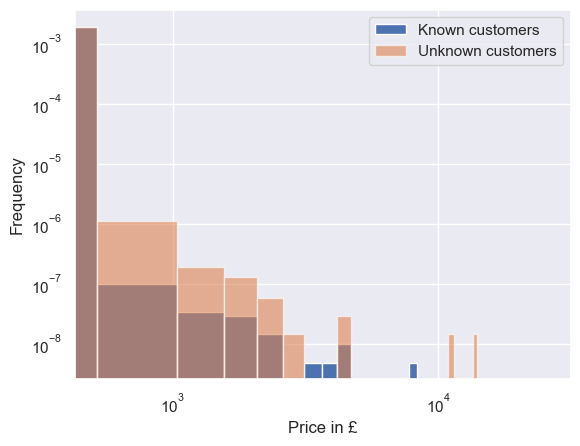

In [64]:
bounds=(0, 26000)
bins=50
ax = df.dropna()["UnitPrice"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = df[df["CustomerID"].isnull()]["UnitPrice"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, 
                                                 label="Unknown customers")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

In [65]:
def ecdf(data):
    """ Compute ECDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    return(x,y)

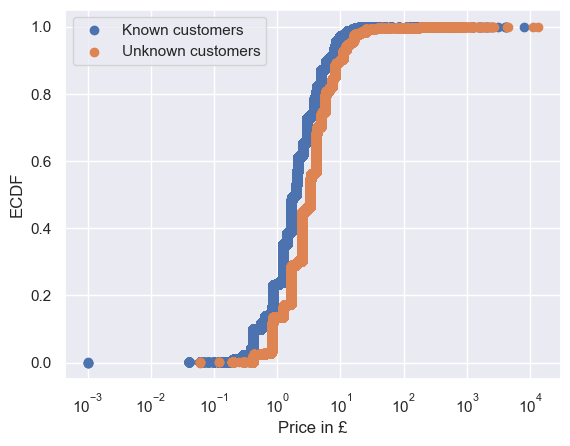

In [66]:
price_known = df.dropna()["UnitPrice"].values
price_unknown = df[df["CustomerID"].isnull()]["UnitPrice"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(price_known), label="Known customers")
ax.scatter(*ecdf(price_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

The plot below shows that customers with unknown **Customer ID** also order less items than registered customers.

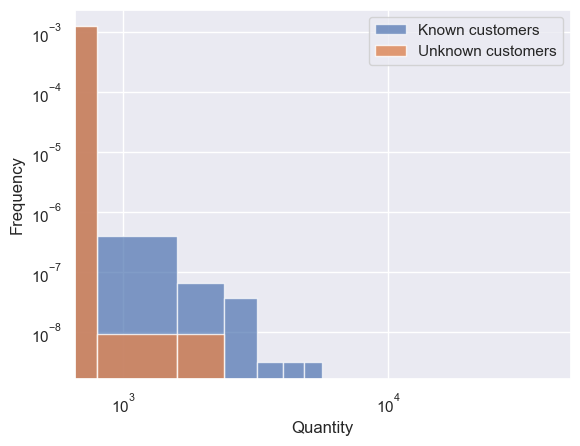

In [67]:
bounds=(0, 40000)
bins=50
ax = df.dropna()["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers", alpha=0.7)
_ = df[df["CustomerID"].isnull()]["Quantity"].plot(kind="hist", range=bounds, bins=bins, density=True, 
                                                    label="Unknown customers", alpha=0.8)
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel("Quantity")
_ = ax.legend()

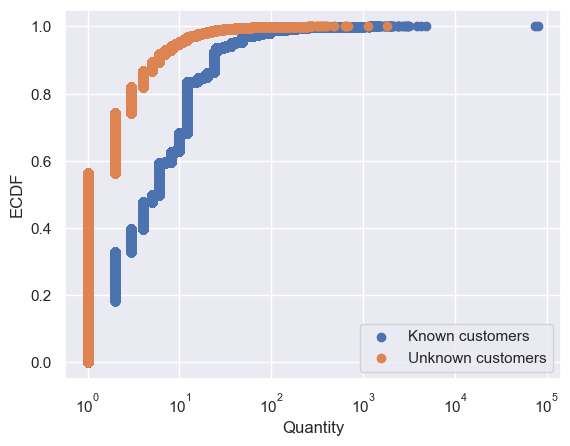

In [68]:
quant_known = df.dropna()["Quantity"].values
quant_unknown = df[df["CustomerID"].isnull()]["Quantity"].values

f, ax = plt.subplots()
ax.scatter(*ecdf(quant_known), label="Known customers")
ax.scatter(*ecdf(quant_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Quantity")
ax.legend()

Let's check the total price and total quantity of items ordered per invoice. Customers without **Customer ID** pay higher invoice bills that registered customers.

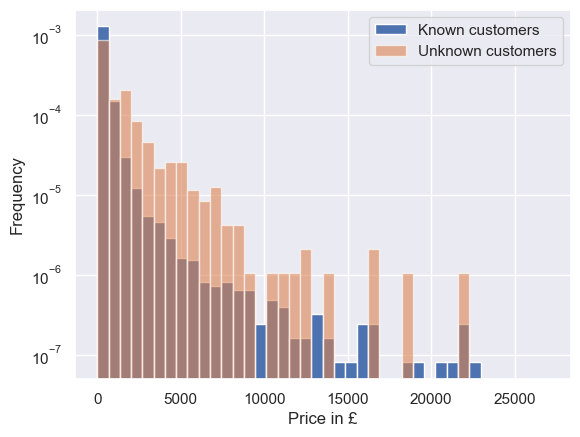

In [69]:
df_inv = df.dropna().groupby("InvoiceNo").agg({"TotalPrice": "sum", "Quantity":"sum"})
df_inv_na = df[df["CustomerID"].isnull()].groupby("InvoiceNo").agg({"TotalPrice": "sum", "Quantity":"sum"})

bounds=(0, 27000)
bins=40
ax = df_inv["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, density=True, label="Known customers")
_ = df_inv_na["TotalPrice"].plot(kind="hist", range=bounds, bins=bins, alpha=0.6, density=True, label="Unknown customers")
ax.set_yscale("log")
#ax.set_xscale("log")
ax.set_xlabel("Price in £")
_ = ax.legend()

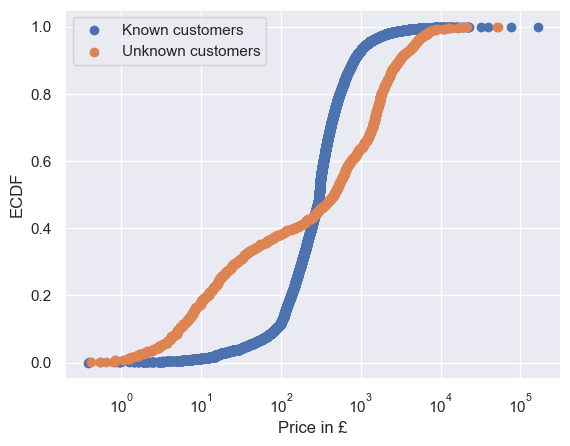

In [70]:
totprice_known = df.dropna().groupby("InvoiceNo")["TotalPrice"].sum().values
totprice_unknown = df[df["CustomerID"].isnull()].groupby("InvoiceNo")["TotalPrice"].sum().values

f, ax = plt.subplots()
ax.scatter(*ecdf(totprice_known), label="Known customers")
ax.scatter(*ecdf(totprice_unknown), label="Unknown customers")
ax.set_xscale("log")
ax.set_ylabel("ECDF")
ax.set_xlabel("Price in £")
ax.legend()

The figure below shows a scatter plot with the total quantity of items per invoice in the x axis versus the total price per invoice on the y-axis. We clearly see two different buying patterns between the two sets of customers, the customers without **Customer ID** buy less items but more expensive items than customers with a **Customer ID**.

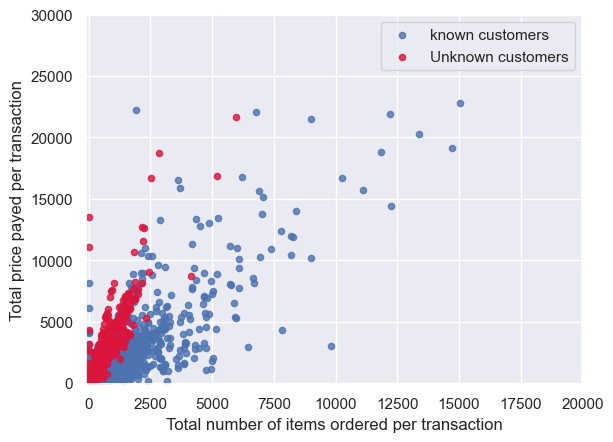

In [71]:
ax = df_inv.plot(kind="scatter", x="Quantity", y="TotalPrice", alpha=0.8, label="known customers")
df_inv_na.plot(kind="scatter", x="Quantity", y="TotalPrice", ax=ax, color="crimson", alpha=0.8, label="Unknown customers")
ax.set_ylim(-100, 30000)
ax.set_xlim(-100, 20000)
ax.set_ylabel("Total price payed per transaction")
ax.set_xlabel("Total number of items ordered per transaction")
_ = ax.legend()


# Segmentation

A way to create customer segments based on their purchases patterns is to perform a RFM (Recency, Frequency, Monetary) analysis. It groups the customers on the basis of their previous purchase transactions. Below are the definitions of each term in RFM:

* Recency: Time since customer's last transaction (with the max date)

* Frequency: Total number of transactions 

* Monetary: Total money spend by the customer.

We will create a new dataframe with these metrics computed for each customers. We therefore need to drop the rows with missing values in the **Customer ID** column.

In [72]:
from datetime import timedelta
snapshot_date = max(df.InvoiceDate) 


In [75]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"])


In [76]:
snapshot_date = df["InvoiceDate"].max() + pd.Timedelta(days=1)


In [77]:
rfm = (
    df.dropna(subset=["CustomerID"])
      .groupby("CustomerID")
      .agg({
          "InvoiceNo": "nunique",
          "InvoiceDate": lambda date: (snapshot_date - date.max()).days,
          "TotalPrice": "sum"
      })
)

rfm.rename(columns={
    "InvoiceNo": "frequency",
    "InvoiceDate": "recency",
    "TotalPrice": "monetary"
}, inplace=True)


rfm.head(5)

,frequency,recency,monetary
CustomerID,,,
12346.0,1,326,77183.60
12347.0,7,2,4310.00
12348.0,4,75,1797.24
12349.0,1,19,1757.55
12350.0,1,310,334.40


In [78]:
rfm.describe()

,frequency,recency,monetary
count,4338.000000,4338.000000,4338.000000
mean,4.272015,92.536422,2054.266460
std,7.697998,100.014169,8989.230441
min,1.000000,1.000000,3.750000
25%,1.000000,18.000000,307.415000
50%,2.000000,51.000000,674.485000
75%,5.000000,142.000000,1661.740000
max,209.000000,374.000000,280206.020000


Let's plot the distributions of the three quantities.

C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\2047032160.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm.query("frequency < 100")["frequency"], kde=False, ax=ax[0])
C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\2047032160.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(

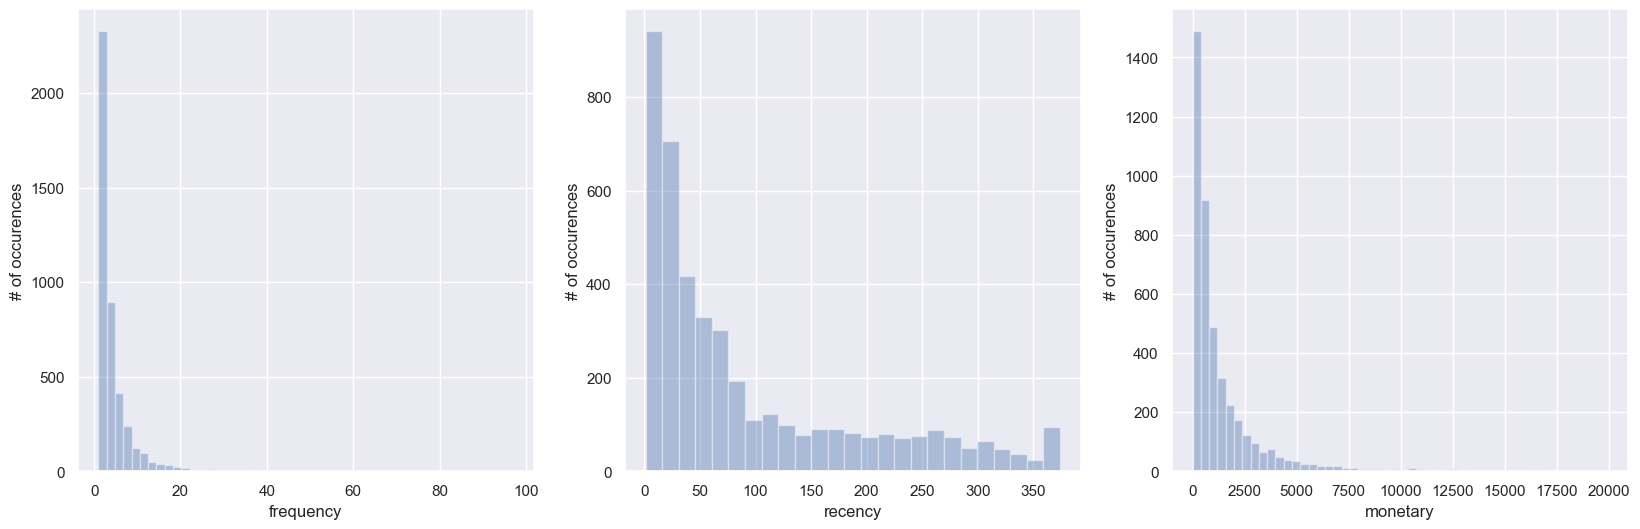

In [79]:
f, ax = plt.subplots(1, 3, figsize=(20, 6))
for a in ax:
    a.set_ylabel("# of occurences")

sns.distplot(rfm.query("frequency < 100")["frequency"], kde=False, ax=ax[0])

sns.distplot(rfm["recency"], kde=False, ax=ax[1])

sns.distplot(rfm.query("monetary < 20000")["monetary"], kde=False, ax=ax[2]);

The next task is two find clusters in the RFM values, this will be done with the KMeans algorithm of scikit-learn.

In [80]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy import stats

C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\2039781068.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(transformation(rfm[col]), kde=False, ax=a)


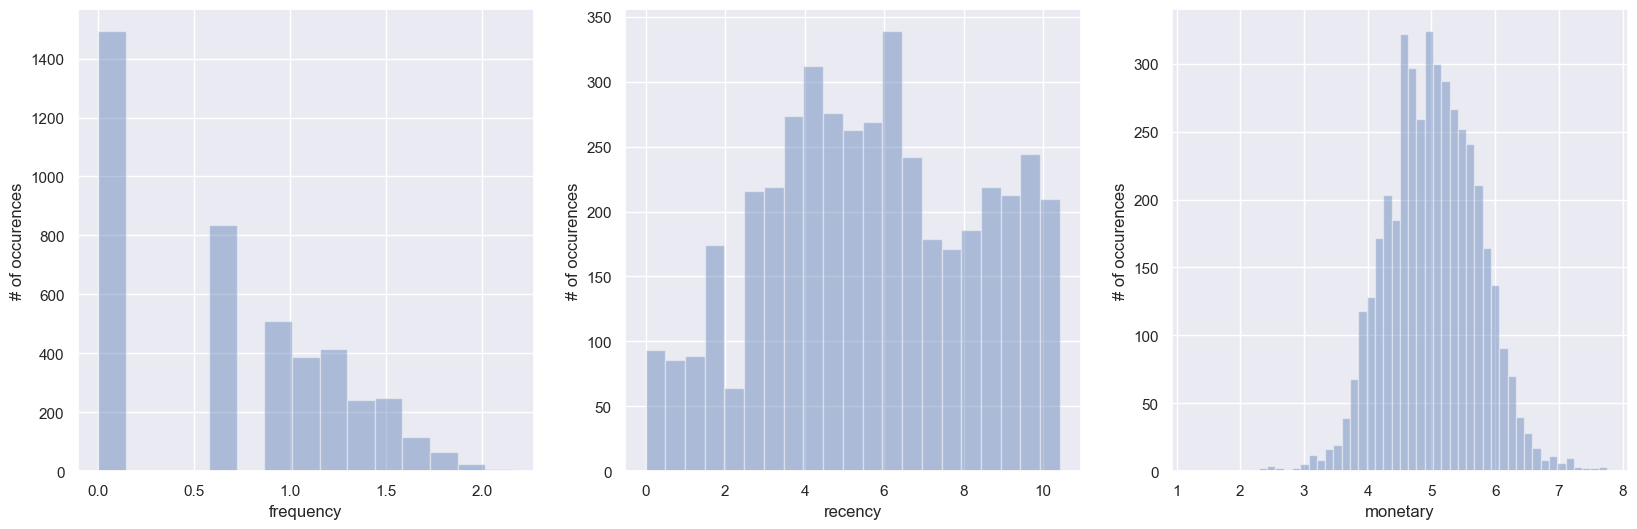

In [81]:
def plot_dist_transformed(transformation=lambda x: x):

    f, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i, a in enumerate(ax):
        a.set_ylabel("# of occurences")
        
        col = rfm.columns[i]
        sns.distplot(transformation(rfm[col]), kde=False, ax=a)
        a.set_xlabel(col)
        
plot_dist_transformed(lambda x: stats.boxcox(x)[0])

KMeans algorithm assumptions:
* Symmetric distribution of variables (not skewed)
* Variables with same average values
* Variables with same variance

So we need to unskew the variables (with a log transformation) and standardize them afterwards.

In [85]:
rfm_unskewed = np.array([stats.boxcox(rfm[["frequency", "recency", "monetary"]].values[:,i])[0] for i in range(3)]).T

In [86]:
scaler = StandardScaler()
scaler.fit(rfm_unskewed)
rfm_scaled = pd.DataFrame(scaler.transform(rfm_unskewed), columns=["frequency", "recency", "monetary"])

In [89]:
rfm_scaled.head()

,frequency,recency,monetary
0,-1.184682,1.624870,3.144114
1,1.159357,-1.841636,1.376049
2,0.664699,0.291210,0.749774
3,-1.184682,-0.679354,0.733175
4,-1.184682,1.573275,-0.591544


C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\1149741438.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfms[col], kde=False, ax=a)


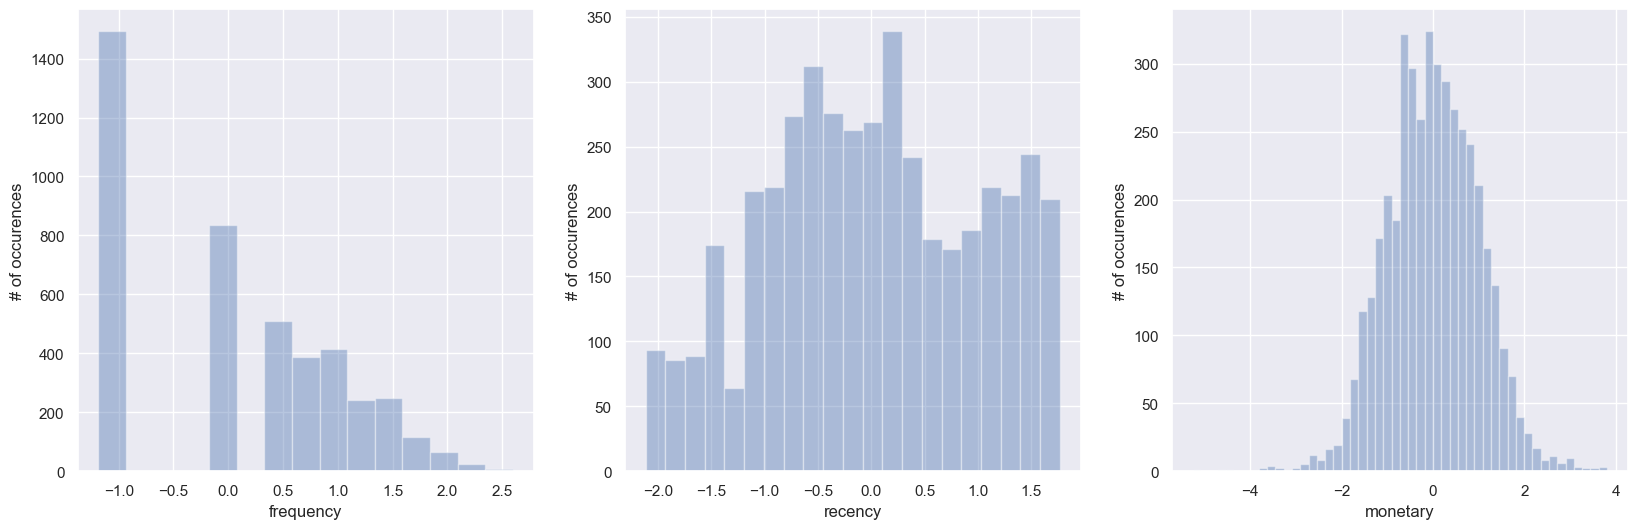

In [88]:
def plot_dist_scaled(rfm_scaled):

    f, ax = plt.subplots(1, 3, figsize=(20, 6))
    for i, a in enumerate(ax):
        a.set_ylabel("# of occurences")
        
        col = rfms.columns[i]
        sns.distplot(rfms[col], kde=False, ax=a)
        a.set_xlabel(col)
        
plot_dist_scaled()

Now we need to find the optimum number of clusters, to do so we will compute different metrics:

* the Silhouette score (higher is best)
* the Calinski and Harabasz score (higher is best)
* the Davies-Bouldin score (lower is best)
* Elbow method on the inertia metric (best number of clusters at the elbow/kink).

In [95]:
inertia = []
for k in range(2, 8):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(rfm_scaled)
    inertia.append(km.inertia_)

Text(0.5, 1.0, 'Elbow Method')

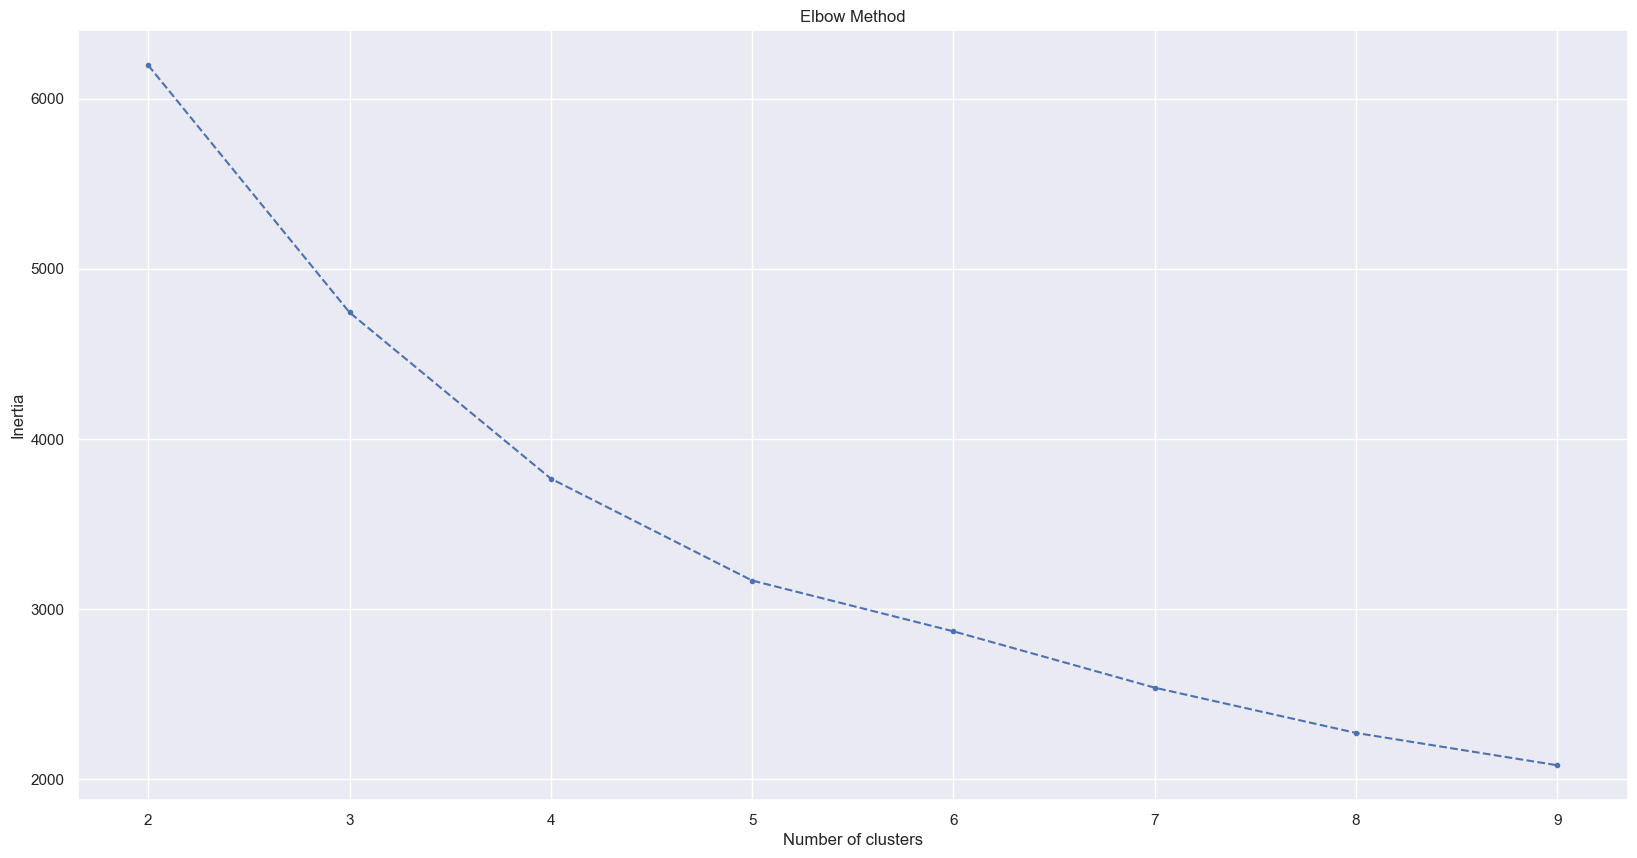

In [99]:
f, ax = plt.subplots(1, figsize=(20, 10))

ax.plot(n_clusters, inertias, ".--")
ax.set_xlabel("Number of clusters")
ax.set_ylabel("Inertia")
ax.set_title("Elbow Method")


The plot suggest that the best number of clusters is 3, Kmeans will compute and assign the clusters for each customer.

In [100]:
nclusters=3
kmeans = KMeans(n_clusters=nclusters, random_state=13)
kmeans.fit(rfm_scaled)

rfm["cluster"] = kmeans.predict(rfm_scaled)

In [104]:
rfm.head()

,frequency,recency,monetary,cluster
CustomerID,,,,
12346.0,1,326,77183.60,2
12347.0,7,2,4310.00,0
12348.0,4,75,1797.24,2
12349.0,1,19,1757.55,2
12350.0,1,310,334.40,1


Below is the number of customers in each cluster.

In [105]:
rfm["cluster"].value_counts()

cluster
1    1624
2    1599
0    1115
Name: count, dtype: int64

Cluster summury

In [106]:
cluster_summary = (
    rfm.groupby("cluster")
       .agg(
           customers=("frequency", "count"),
           avg_frequency=("frequency", "mean"),
           avg_recency=("recency", "mean"),
           avg_monetary=("monetary", "mean"),
           total_monetary=("monetary", "sum")
       )
       .round(2)
)

cluster_summary



,customers,avg_frequency,avg_recency,avg_monetary,total_monetary
cluster,,,,,
0,1115,10.65,17.11,6026.67,6719733.51
1,1624,1.13,165.24,315.06,511656.45
2,1599,3.02,71.29,1050.67,1680017.94


Cluster 0 – Loyal Customers: High frequency, very recent activity, and highest spend; core revenue drivers. Focus on retention and loyalty benefits.

Cluster 2 – Growth Customers: Moderate frequency and spend with declining recency; good potential to convert into loyal customers through targeted offers.

Cluster 1 – At-Risk Customers: Low frequency, long inactivity, and low spend; likely churned. Use selective winback or deprioritize.

Let's plot the normalized distributions of the RFM quantities for each cluster.

C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\3240613501.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_c.query("frequency < 30")["frequency"], kde=True, ax=ax[0],
C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\3240613501.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe57

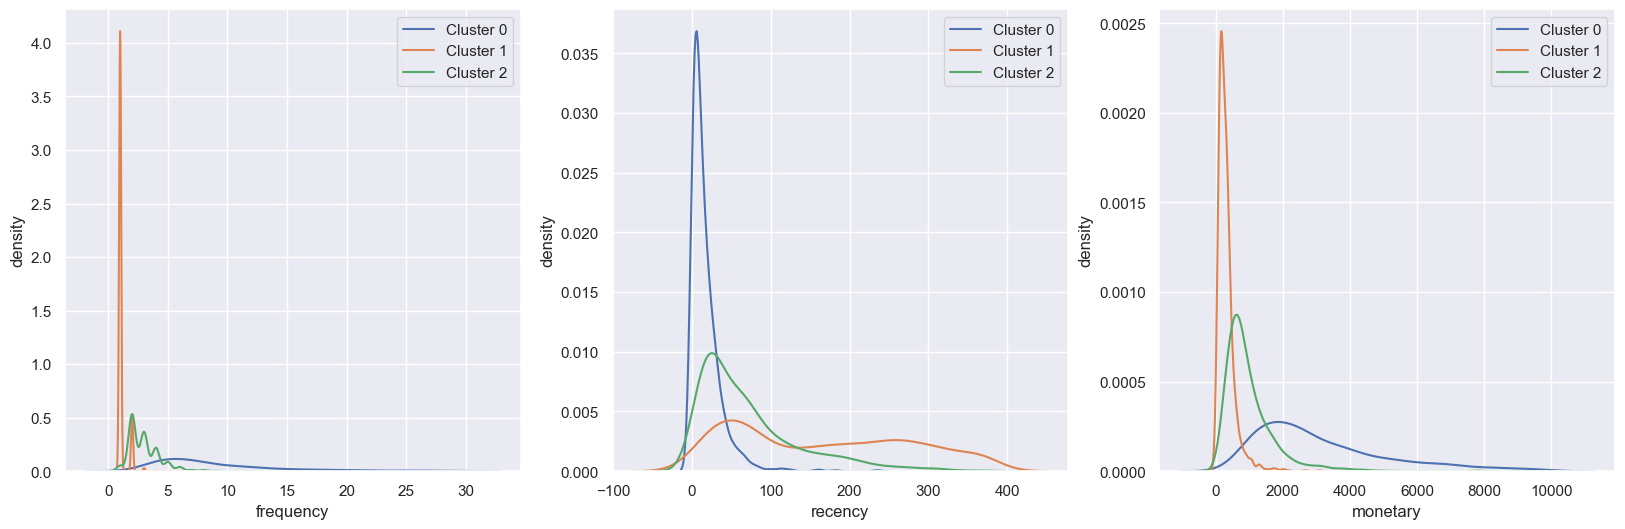

In [108]:
f, ax = plt.subplots(1, 3, figsize=(20, 6))
for a in ax:
    a.set_ylabel("density")
    
for c in range(nclusters):
    rfm_c =  rfm.query(f"cluster == {c}")
    label = f"Cluster {c}"

    sns.distplot(rfm_c.query("frequency < 30")["frequency"], kde=True, ax=ax[0], 
                 label=label, hist=False, norm_hist=True)

    sns.distplot(rfm_c["recency"], kde=True, ax=ax[1], label=label, hist=False, 
                 norm_hist=True)

    sns.distplot(rfm_c.query("monetary < 10000")["monetary"], kde=True, ax=ax[2], 
                 label=label, hist=False, norm_hist=True)
    
for a in ax:
    a.legend();

In [109]:
rfm

,frequency,recency,monetary,cluster
CustomerID,,,,
12346.0,1,326,77183.60,2
12347.0,7,2,4310.00,0
12348.0,4,75,1797.24,2
12349.0,1,19,1757.55,2
12350.0,1,310,334.40,1
...,...,...,...,...
18280.0,1,278,180.60,1
18281.0,1,181,80.82,1
18282.0,2,8,178.05,2


In [110]:
rfm

,frequency,recency,monetary,cluster
CustomerID,,,,
12346.0,1,326,77183.60,2
12347.0,7,2,4310.00,0
12348.0,4,75,1797.24,2
12349.0,1,19,1757.55,2
12350.0,1,310,334.40,1
...,...,...,...,...
18280.0,1,278,180.60,1
18281.0,1,181,80.82,1
18282.0,2,8,178.05,2


C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\1484561318.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(toplot, kde=True, ax=a, label=label, hist=False)#, bins=bins, hist_kws=dict(range=ranges[col]))
C:\Users\nidhirai\AppData\Local\Temp\ipykernel_25428\1484561318.py:28: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwask

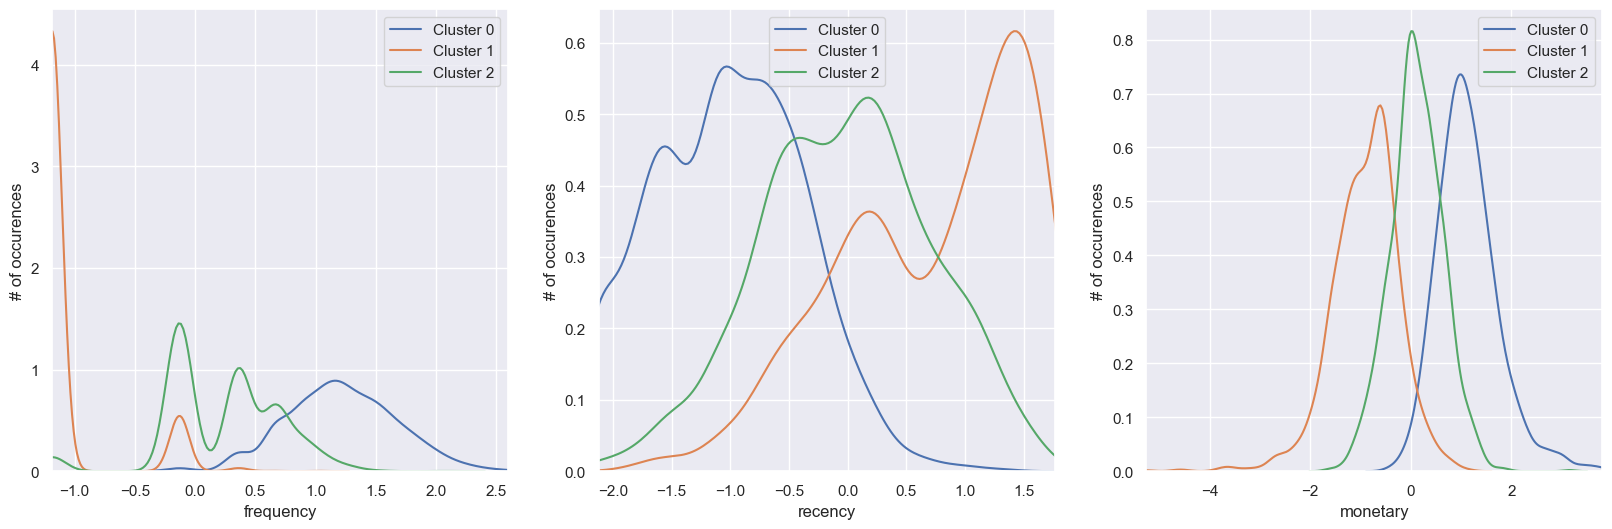

In [111]:
def plot_dist_transformed_cluster(transformation=lambda x: x, columns=["frequency", "recency", "monetary"]):

    f, ax = plt.subplots(1, 3, figsize=(20, 6))
    
    bins = 30
    
    ranges = {}
    
    rfm_ = pd.DataFrame(scaler.transform(transformation(rfm[columns])), columns=columns)
    rfm_["cluster"] = rfm["cluster"].values
    
    
    for i, a in enumerate(ax):
        a.set_ylabel("# of occurences")
        col = rfm_.columns[i]
        x_min, y_min = min(rfm_[col]), max(rfm_[col])
        ranges[col] = (x_min, y_min)
        a.set_xlim(x_min, y_min)
        a.set_xlabel(col)
        
    for c in range(nclusters):
        rfm_c =  rfm_.query(f"cluster == {c}")
        label = f"Cluster {c}"
    
        for i, a in enumerate(ax):
            col = rfm_c.columns[i]
            toplot = rfm_c[col]
            sns.distplot(toplot, kde=True, ax=a, label=label, hist=False)#, bins=bins, hist_kws=dict(range=ranges[col]))
            a.legend()
        
plot_dist_transformed_cluster(lambda x: np.array([stats.boxcox(x.values[:,i])[0] for i in range(3)]).T)

# Churn prediction

In order to predict wether a customer is active or inactive (alive or dead) in a non-contractual business we can use the RFM. The BG/NBD models, described [here](http://brucehardie.com/papers/018/fader_et_al_mksc_05.pdf), can compute a "customer lifetime value". This is the first I work with this so I don't know the details yet, but the model and other utilities are implemented in the nice [lifetimes package](https://lifetimes.readthedocs.io/en/latest/index.html).

We will build a slightly different RFM dataset using utilities from the lifetimes packages where:

* frequency represents the number of repeat purchases the customer has made. This means that it’s one less than the total number of purchases. This is actually slightly wrong. It’s the count of time periods the customer had a purchase in. So if using days as units, then it’s the count of days the customer had a purchase on.
* T represents the age of the customer in whatever time units chosen (weekly, in the above dataset). This is equal to the duration between a customer’s first purchase and the end of the period under study.
* recency represents the age of the customer when they made their most recent purchases. This is equal to the duration between a customer’s first purchase and their latest purchase. (Thus if they have made only 1 purchase, the recency is 0.)
* monetary_value represents the average value of a given customer’s purchases. This is equal to the sum of all a customer’s purchases divided by the total number of purchases. Note that the denominator here is different than the frequency described above.

In [112]:
from lifetimes.utils import summary_data_from_transaction_data
rfml = summary_data_from_transaction_data(df.dropna(), "CustomerID", "InvoiceDate", "TotalPrice")

In [113]:
rfml.head()

,frequency,recency,T,monetary_value
CustomerID,,,,
12346.0,0.0,0.0,325.0,0.000000
12347.0,6.0,365.0,367.0,599.701667
12348.0,3.0,283.0,358.0,301.480000
12349.0,0.0,0.0,18.0,0.000000
12350.0,0.0,0.0,310.0,0.000000


In [114]:
rfml.describe()

,frequency,recency,T,monetary_value
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,2.864223,130.771554,222.831028,307.028848
std,5.949000,132.210509,117.854570,2612.749850
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,112.000000,0.000000
50%,1.000000,93.000000,248.000000,177.064773
75%,3.000000,252.000000,326.000000,360.162500
max,131.000000,373.000000,373.000000,168469.600000


Now we will fit the model, we get a summary on the fitted parameters of the model and their uncertainty.

In [115]:
from lifetimes import BetaGeoFitter

bgf = BetaGeoFitter(penalizer_coef=0.0)
bgf.fit(rfml["frequency"], rfml["recency"], rfml["T"])

bgf.summary

,coef,se(coef),lower 95% bound,upper 95% bound
r,0.826542,0.026785,0.774044,0.879040
alpha,68.905121,2.611786,63.786020,74.024221
a,0.003437,0.010339,-0.016828,0.023702
b,6.745116,22.414725,-37.187745,50.677978


From the fitted model we can do many nice things for instance the expected number of transactions an artificial customer is to make in the next time period (1 day), given his or her recency (age at last purchase) and frequency (the number of repeat transactions he or she has made).

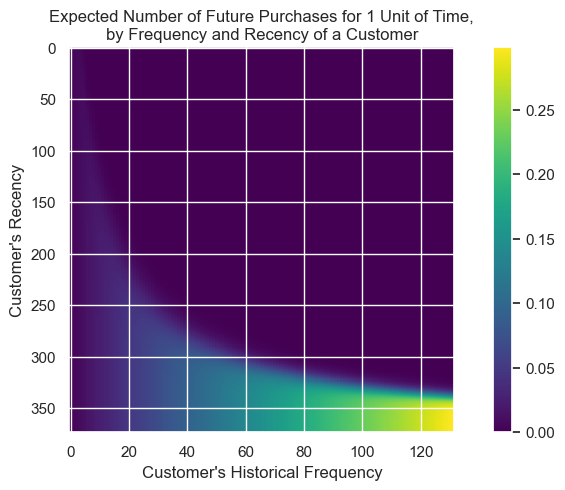

In [116]:
from lifetimes.plotting import plot_frequency_recency_matrix
f = plt.figure(figsize=(10, 5))
plot_frequency_recency_matrix(bgf, cmap="viridis");

We can see that if a customer has bought ~250 times from the retail service, and their latest purchase was when they were a bit older than 700 weeks (given the individual is ~700 weeks old), then they are the best customers (bottom-right). The coldest customers are those that are in the top-right corner: they bought a lot quickly, and we haven’t seen them in weeks.

We can also plot the probability of still being alive.

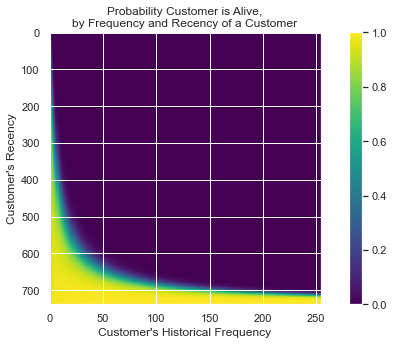

In [81]:
from lifetimes.plotting import plot_probability_alive_matrix
f = plt.figure(figsize=(10, 5))
plot_probability_alive_matrix(bgf, cmap="viridis");

### Have any users churned during the second half of 2011?

To determine this I will use the probabilities histories of still being alive as a function of the time computed from the BG/NBD model.

In [82]:
from lifetimes.utils import calculate_alive_path
from tqdm import tqdm

customer_ids = df.dropna()["Customer ID"].unique()

alive_paths = {}
for i, cid in enumerate(tqdm(customer_ids)):
    days_since_birth = int(rfml.loc[cid]["T"])
    sp_trans = df[df["Customer ID"] == cid]
    alive_paths[cid] = calculate_alive_path(bgf, sp_trans, "InvoiceDate", days_since_birth)

100%|██████████| 5878/5878 [03:21<00:00, 29.12it/s] 


I computed the "alive paths" for each customers (probability of still being alive), an example of those paths is plotted below. The vertical red lines represent the date of each purchase.

In [83]:
from lifetimes.plotting import plot_history_alive

def plot_path(cid, ax=None, july_line=False):
    days_since_birth = int(rfml.loc[cid]["T"])
    sp_trans = df[df["Customer ID"] == cid]
    plot_history_alive(bgf, days_since_birth, sp_trans, "InvoiceDate", ax=ax)
    if july_line:
        plt.vlines(datetime(2011, 7, 1), 0, 1, color="forestgreen")

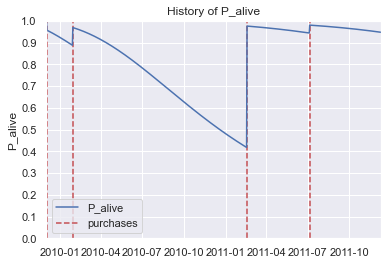

In [84]:
plot_path(13085)

I will collect the **Customer ID** of the customers that have probably churned in the second half of 2011, to do so I need to discard the customers that churned before that.

In [ ]:
ndays = (df["InvoiceDate"].max() - datetime(2011, 7, 1)).days

inactive_after_july = []
for k, v in alive_paths.items():
    
    # if customer made his first order before july 2011
    if len(v) >= ndays:
        # if minimum probability of still being alive is less
        # than 0.5, the customer is considered to have churned
        # before july 2011
        if min(v[:-ndays]) < 0.5:
            continue
            
        v = list(v)[-ndays:]
        
    # if one there is one transaction after septembre 2011 we consider
    # the user will not churn.
    if df.loc[df["Customer ID"] == k, "InvoiceDate"].max() > datetime(2011, 9, 1):
        continue

    # if probability of still being alive in the second half of
    # 2011 is less than 0.3 I consider that the customer have churned.
    if min(v) < 0.3:
        inactive_after_july.append(k)

In [ ]:
print(f"Number of users that probably churned in the second half of 2011: {len(inactive_after_july)}")

Let's plot some "alive paths" of those users to make sure they have probably churned during this period.

In [ ]:
f = plt.figure(figsize=(10, 5))
plot_path(inactive_after_july[0], july_line=True)

In [ ]:
f = plt.figure(figsize=(10, 5))
plot_path(inactive_after_july[5], july_line=True)

In [ ]:
f = plt.figure(figsize=(10, 5))
plot_path(inactive_after_july[10], july_line=True)

### Are there any users in high risk of churning by the end of 2011?

To determine this we need to gather customers that survided the end of the 2011 and have a low number of expected number of transactions in the future. Here the future is 22 days since the last date in the dataset is the 9th of December 2011.

In [ ]:
alive_after_july = []
for k, v in alive_paths.items():
      
    # if customer made is first order before july 2011
    if len(v) >= ndays:
        v_ = list(v)[-ndays:]
    else:
        v_ = v
    
    # remove users that have less than 2 consecutives transactions
    if rfml.loc[k, "frequency"] < 1:
        continue
        
    # users that are still alive in the second half of 2011
    if min(v_) > 0.5:
        alive_after_july.append(k)

We compute the expected number of purchases in the next 22 days and rank the customers.

In [ ]:
t = 22
rfml["predicted_purchases"] = bgf.conditional_expected_number_of_purchases_up_to_time(t, rfml["frequency"], rfml["recency"], rfml["T"])
rfml.sort_values(by="predicted_purchases", ascending=False).head(5)

Below is the distribution the predicted number of transactions in the next 22 days.

In [ ]:
ax = rfml.loc[alive_after_july, "predicted_purchases"].plot(kind="hist", bins=50)
ax.set_xlabel("predicted number of transactions (in 22 days)")

Let's plot the normalized distributions the predicted number of transactions in the next 22 days, for customers probably alived in the second half of 2011, for each cluster group defined above.

In [ ]:
rfml.loc[customer_ids, "cluster"] = rfm.loc[customer_ids, "cluster"]

In [ ]:
f = plt.figure(figsize=(10, 5))

for c in range(5):
    rfm_c =  rfml.loc[alive_after_july].query(f"cluster == {c}")
    label = f"Cluster {c}"

    sns.distplot(rfm_c["predicted_purchases"], kde=True, 
                 label=label, hist=False, norm_hist=True)
plt.xlim(0, 0.7)
plt.xlabel("predicted number of transactions (in 22 days)")

As we see member of the cluster 3 have higher risks of churning in the next 22 days. We could also select a fraction of the customers with the lowest predicted number of transactions and act in order to keep them.

In [ ]:
rfml.loc[alive_after_july]["cluster"].value_counts()

In [ ]:
rfml.loc[alive_after_july].groupby("cluster").mean()

In [ ]:
rfm.groupby("cluster").mean()

### Customer Lifetime Value

Let's compute for each customer its CLV and compare for each cluster.

In [ ]:
rfml[['monetary_value', 'frequency']].corr()

In [ ]:
from lifetimes import GammaGammaFitter

rfml_m = rfml[rfml.monetary_value > 0]


ggf = GammaGammaFitter(penalizer_coef = 0)
ggf.fit(rfml_m['frequency'],
        rfml_m['monetary_value'])
print(ggf)

In [ ]:
print(ggf.conditional_expected_average_profit(
        rfml_m['frequency'],
        rfml_m['monetary_value']
    ).head(10))

In [ ]:
print("Expected conditional average profit: %s, Average profit: %s" % (
    ggf.conditional_expected_average_profit(
        rfml_m['frequency'],
        rfml_m['monetary_value']
    ).mean(),
    rfml_m[rfml_m['frequency']>0]['monetary_value'].mean()
))

In [ ]:
bgf_clv = BetaGeoFitter(penalizer_coef=0.0)
bgf_clv.fit(rfml_m['frequency'], rfml_m['recency'], rfml_m['T'])

print(ggf.customer_lifetime_value(
    bgf_clv, #the model to use to predict the number of future transactions
    rfml_m['frequency'],
    rfml_m['recency'],
    rfml_m['T'],
    rfml_m['monetary_value'],
    time=1, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
).head(10))

In [ ]:
predicted_sum  = ggf.customer_lifetime_value(
    bgf_clv, #the model to use to predict the number of future transactions
    rfml_m['frequency'],
    rfml_m['recency'],
    rfml_m['T'],
    rfml_m['monetary_value'],
    time=1, # months
    discount_rate=0.01 # monthly discount rate ~ 12.7% annually
)

predicted_sum = pd.DataFrame(predicted_sum)

In [ ]:
ids = predicted_sum.index
predicted_sum.loc[ids, "cluster"] = rfm.loc[ids, "cluster"]

In [ ]:
f, ax = plt.subplots(figsize=(10, 5))

for c in range(5):
    p_c =  predicted_sum.query(f"cluster == {c}")
    label = f"Cluster {c}"

    sns.distplot(p_c["clv"], kde=True, 
                 label=label, hist=False, ax=ax)
ax.set_xlim(10, 10000)
ax.set_xscale("log")
ax.set_xlabel("predicted CLV (in 1 month)")

In [ ]:
predicted_sum.groupby("cluster").agg({"clv": ["mean", "std", "median", "sum"]})

In [ ]:
predicted_sum["cluster"].value_counts()